# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_data.shape

(891, 12)

In [44]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [45]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [47]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#titanic_data['Cabin'].apply(int)

In [49]:
titanic_data=titanic_data[pd.notnull(titanic_data.Embarked)]
titanic_data.shape
#X1.reset_index(drop=True)

(889, 12)

In [50]:
titanic_data.Embarked.value_counts()
titanic_data.Cabin.value_counts()


B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
F G63          1
F E69          1
A19            1
C49            1
A10            1
Name: Cabin, Length: 146, dtype: int64

In [0]:
m1=titanic_data.Age.mean()
#m2=titanic_data.Cabin.mean()
titanic_data.Age=titanic_data.Age.fillna(m1)
#Cabin=titanic_data.Cabin.fillna(m2)


In [0]:
#df = pd.get_dummies(data=titanic_data, columns = Sex)
#df.head()
#titanic_data.shape


In [52]:
#titanic_data = pd.get_dummies(titanic_data)
#titanic_data.Embarked = pd.get_dummies(titanic_data.Embarked)
#titanic_data.head(50)
#titanic_data.shape
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder() 
  
titanic_data['Sex']= le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked']= le.fit_transform(titanic_data['Embarked'])
titanic_data['Ticket']= le.fit_transform(titanic_data['Ticket'])
titanic_data.Ticket.value_counts()
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,522,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,668,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,471,8.0500,NaN,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11e7bef1d0>,
      dtype=object)

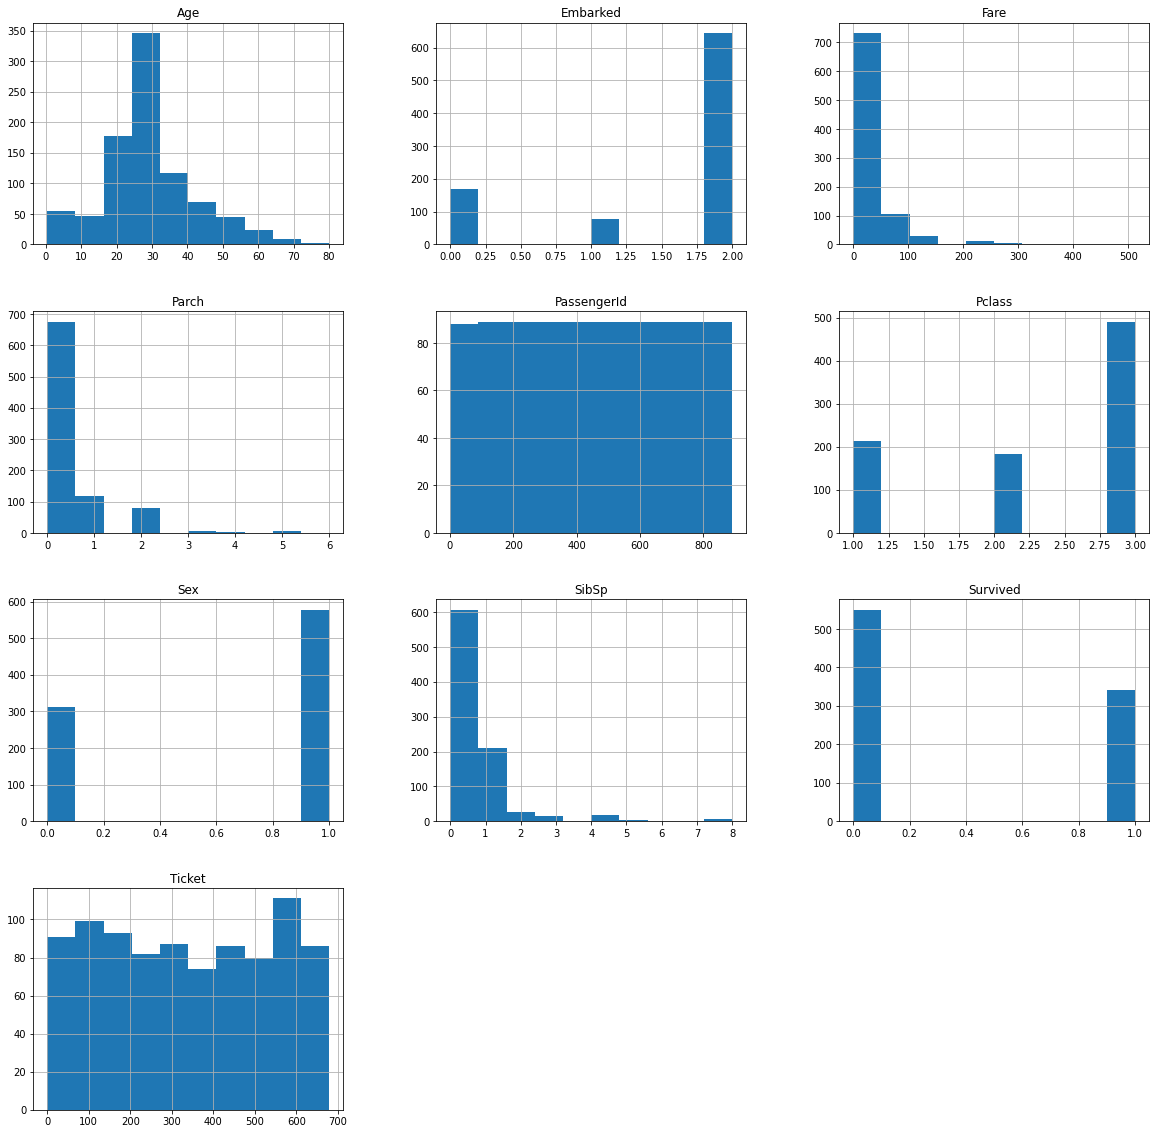

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic_data.hist(figsize=(20,20))

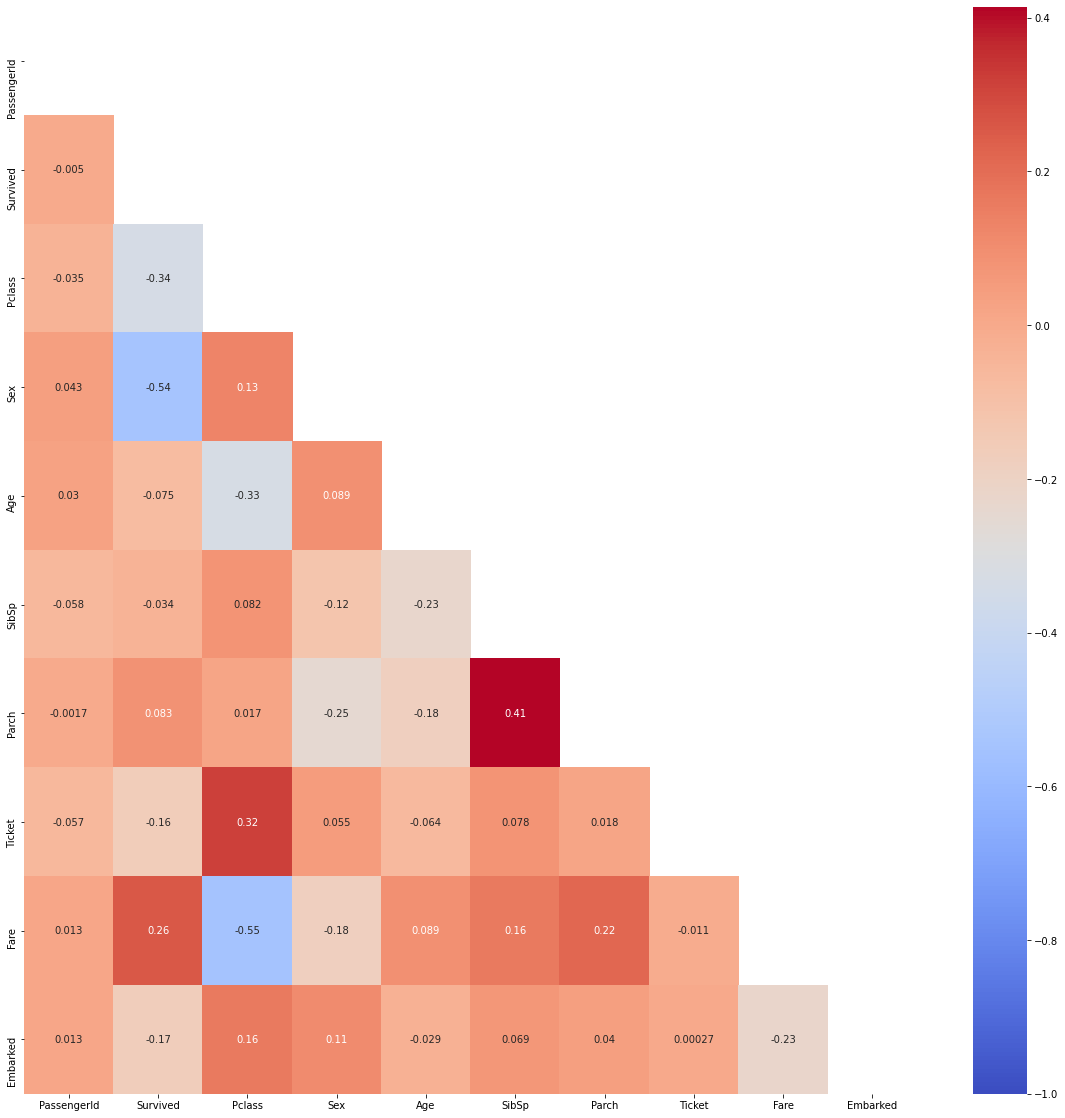

In [54]:
#Visualization of Data using Correlation Matrix
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [0]:
titanic_data_sub= titanic_data[["Sex","Fare","SibSp","Ticket","Age","Pclass","Survived"]]

In [56]:
X = titanic_data_sub.iloc[:,0:6]
y = titanic_data_sub["Survived"]
print(X,y)

     Sex     Fare  SibSp  Ticket        Age  Pclass
0      1   7.2500      1     522  22.000000       3
1      0  71.2833      1     595  38.000000       1
2      0   7.9250      0     668  26.000000       3
3      0  53.1000      1      48  35.000000       1
4      1   8.0500      0     471  35.000000       3
..   ...      ...    ...     ...        ...     ...
886    1  13.0000      0     100  27.000000       2
887    0  30.0000      0      14  19.000000       1
888    0  23.4500      1     674  29.642093       3
889    1  30.0000      0       8  26.000000       1
890    1   7.7500      0     465  32.000000       3

[889 rows x 6 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_features=6,random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [59]:
#dt = DecisionTreeClassifier(max_depth=10,random_state=1)
#dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
print("The accuracy score is:{:.2f}".format(accuracy*100))

The accuracy score is:83.15


In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))

[[98 12]
 [18 50]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



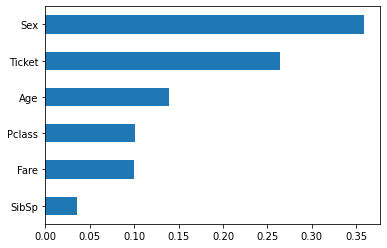

In [61]:
#Create a pd.Series of features importances
importances_dt = pd.Series(dt.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_dt = importances_dt.sort_values()
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh'); 
plt.show()

In [0]:
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X, y, clf=dt, legend=2,X_highlight=X_test)

In [0]:
# Using LOgisticRegression
X1= titanic_data[["Sex","Fare","SibSp","Ticket","Age","Parch","Embarked"]]
y1= titanic_data[["Survived"]]

In [0]:
#X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test size=0.2,random_state=1)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,stratify=y1,random_state=1)


In [65]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1,max_iter=50)

# Fit logreg to the training set
logreg.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y1_pred = logreg.predict(X1_test)
accuracy= accuracy_score(y1_test,y1_pred)
print("The accuracy score is:{:.2f}".format(accuracy*100))

The accuracy score is:82.58


In [67]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# Evaluate the test set MSE
mse_test = MSE(y_test, y_pred)
# Print the test set MSE
print('Test set MSE of logreg: {:.2f}'.format(mse_test))

Test set MSE of logreg: 0.17


In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))


[[98 12]
 [18 50]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [0]:
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X, y, clf=dt, legend=2,X_highlight=X_test)

In [0]:
#Ensembling Method
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1


In [0]:
X1= titanic_data[["Sex","Fare","SibSp","Ticket","Age","Parch","Embarked"]]
y1= titanic_data[["Survived"]]

In [0]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=SEED)

In [0]:
# Instantiate individual classifiers
lr = LogisticRegression(max_iter=50,random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_features=6,random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [74]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.820
K Nearest Neighbours : 0.753
Classification Tree : 0.831


In [75]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.843


In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))


[[100  10]
 [ 18  50]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.83      0.74      0.78        68

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



In [0]:
#Applying Bagging Classifier

X1= titanic_data[["Sex","Fare","SibSp","Ticket","Age","Parch","Embarked"]]
y1= titanic_data[["Survived"]]

In [0]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=SEED)

In [79]:
from sklearn.ensemble import BaggingClassifier
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,max_features=6,random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=400, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.848


In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))


[[97 13]
 [14 54]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [0]:
#Applying Boosting
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [0]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=15,max_features=6, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
y_pred = adb_clf.predict(X_test)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [83]:
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.85


In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))


[[141  24]
 [ 26  76]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       165
           1       0.76      0.75      0.75       102

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



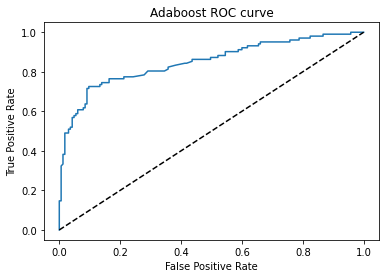

In [85]:
from sklearn.metrics import roc_curve  
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC curve')
# show the plot
plt.show()